<a href="https://colab.research.google.com/github/cesar1109/Fundamentos-de-Ciencia-de-Dados---2024/blob/main/Exercise3_Dados_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Número de amostras antes de tratar os valores ausentes e outliers: 48843
Número de valores ausentes por coluna:
age                  0
workclass         2800
fnlwgt               1
education            1
education-num        1
marital-status       1
occupation        2810
relationship         1
race                 1
sex                  1
capital-gain         1
capital-loss         1
hours-per-week       1
native-country     858
income               1
dtype: int64

Número de amostras após tratamento dos valores ausentes (Abordagem 1): 45222

Número de amostras após tratamento dos valores ausentes (Abordagem 2): 48843

Número de amostras após tratamento dos valores ausentes (Abordagem 3): 48843


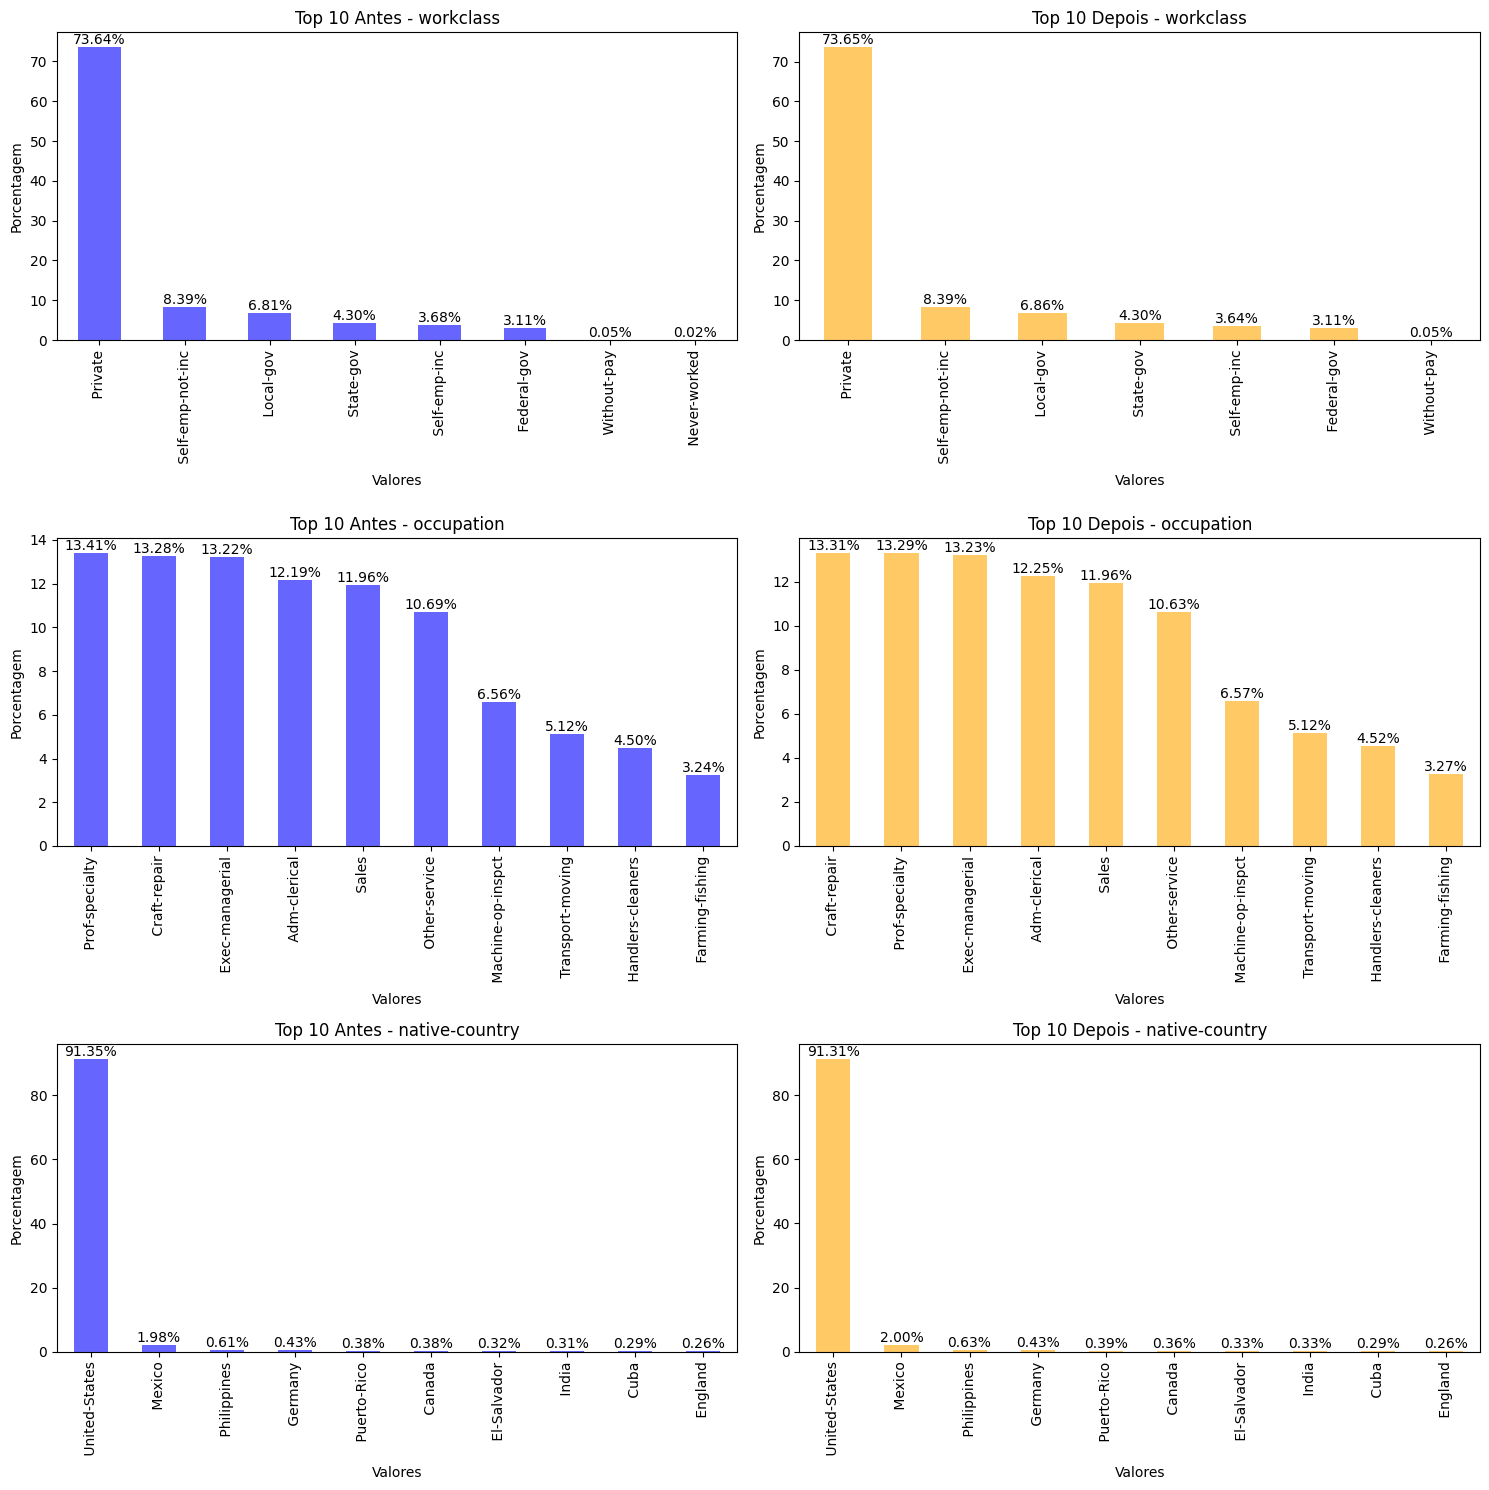

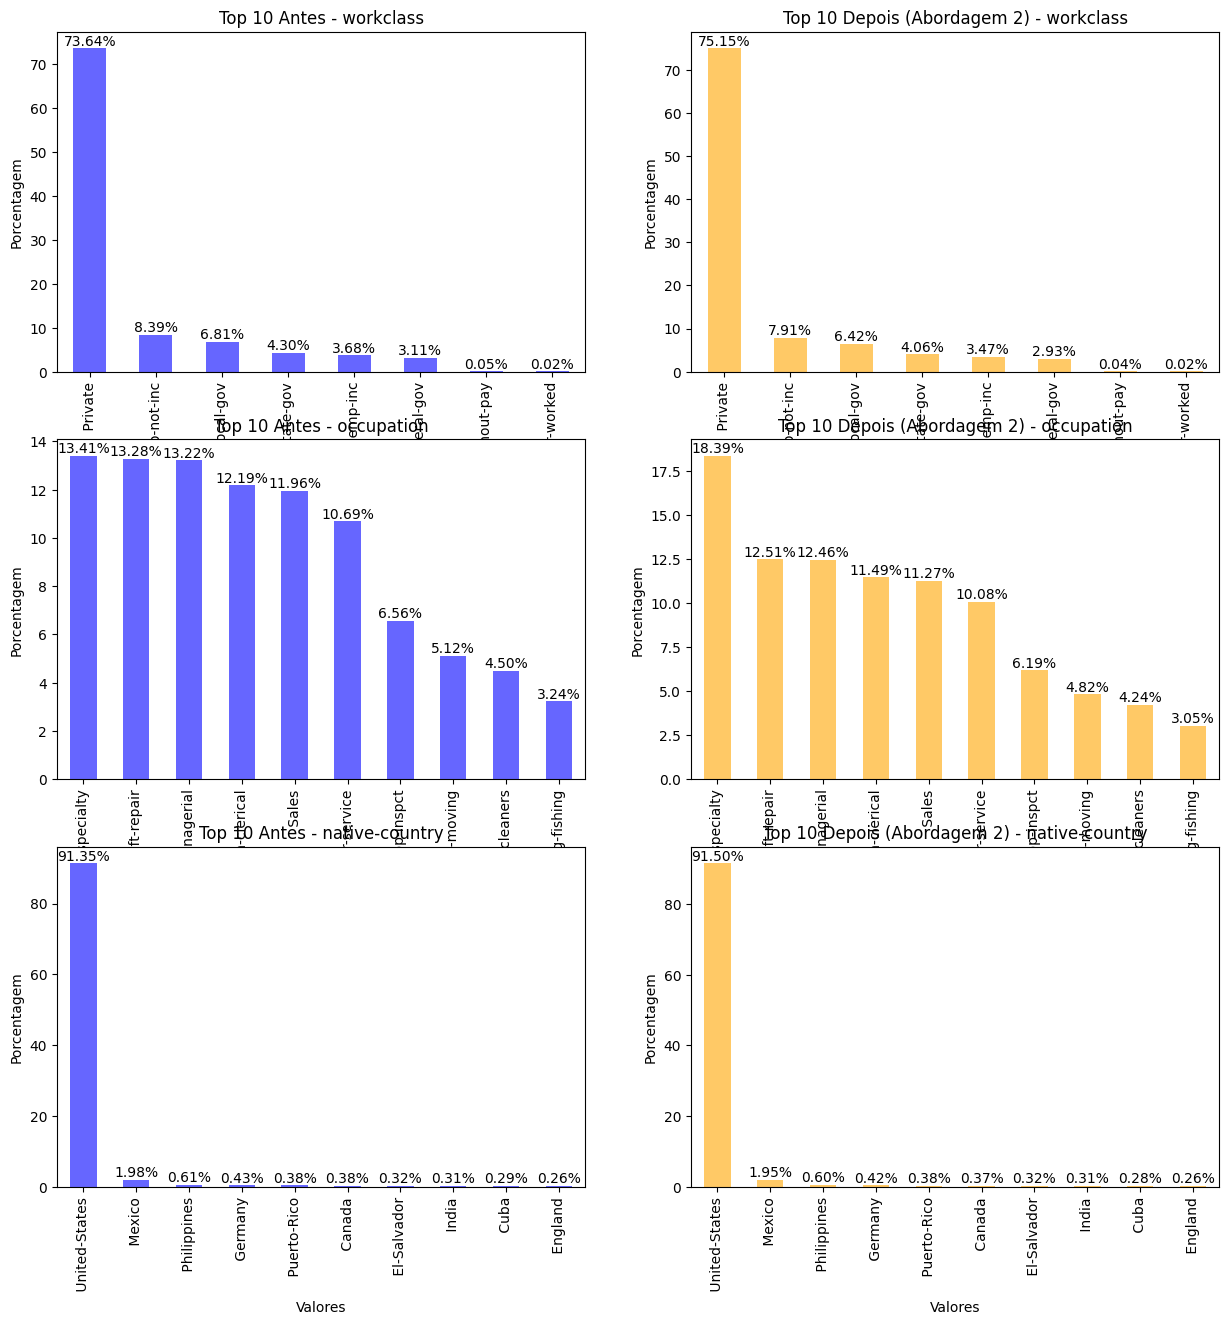

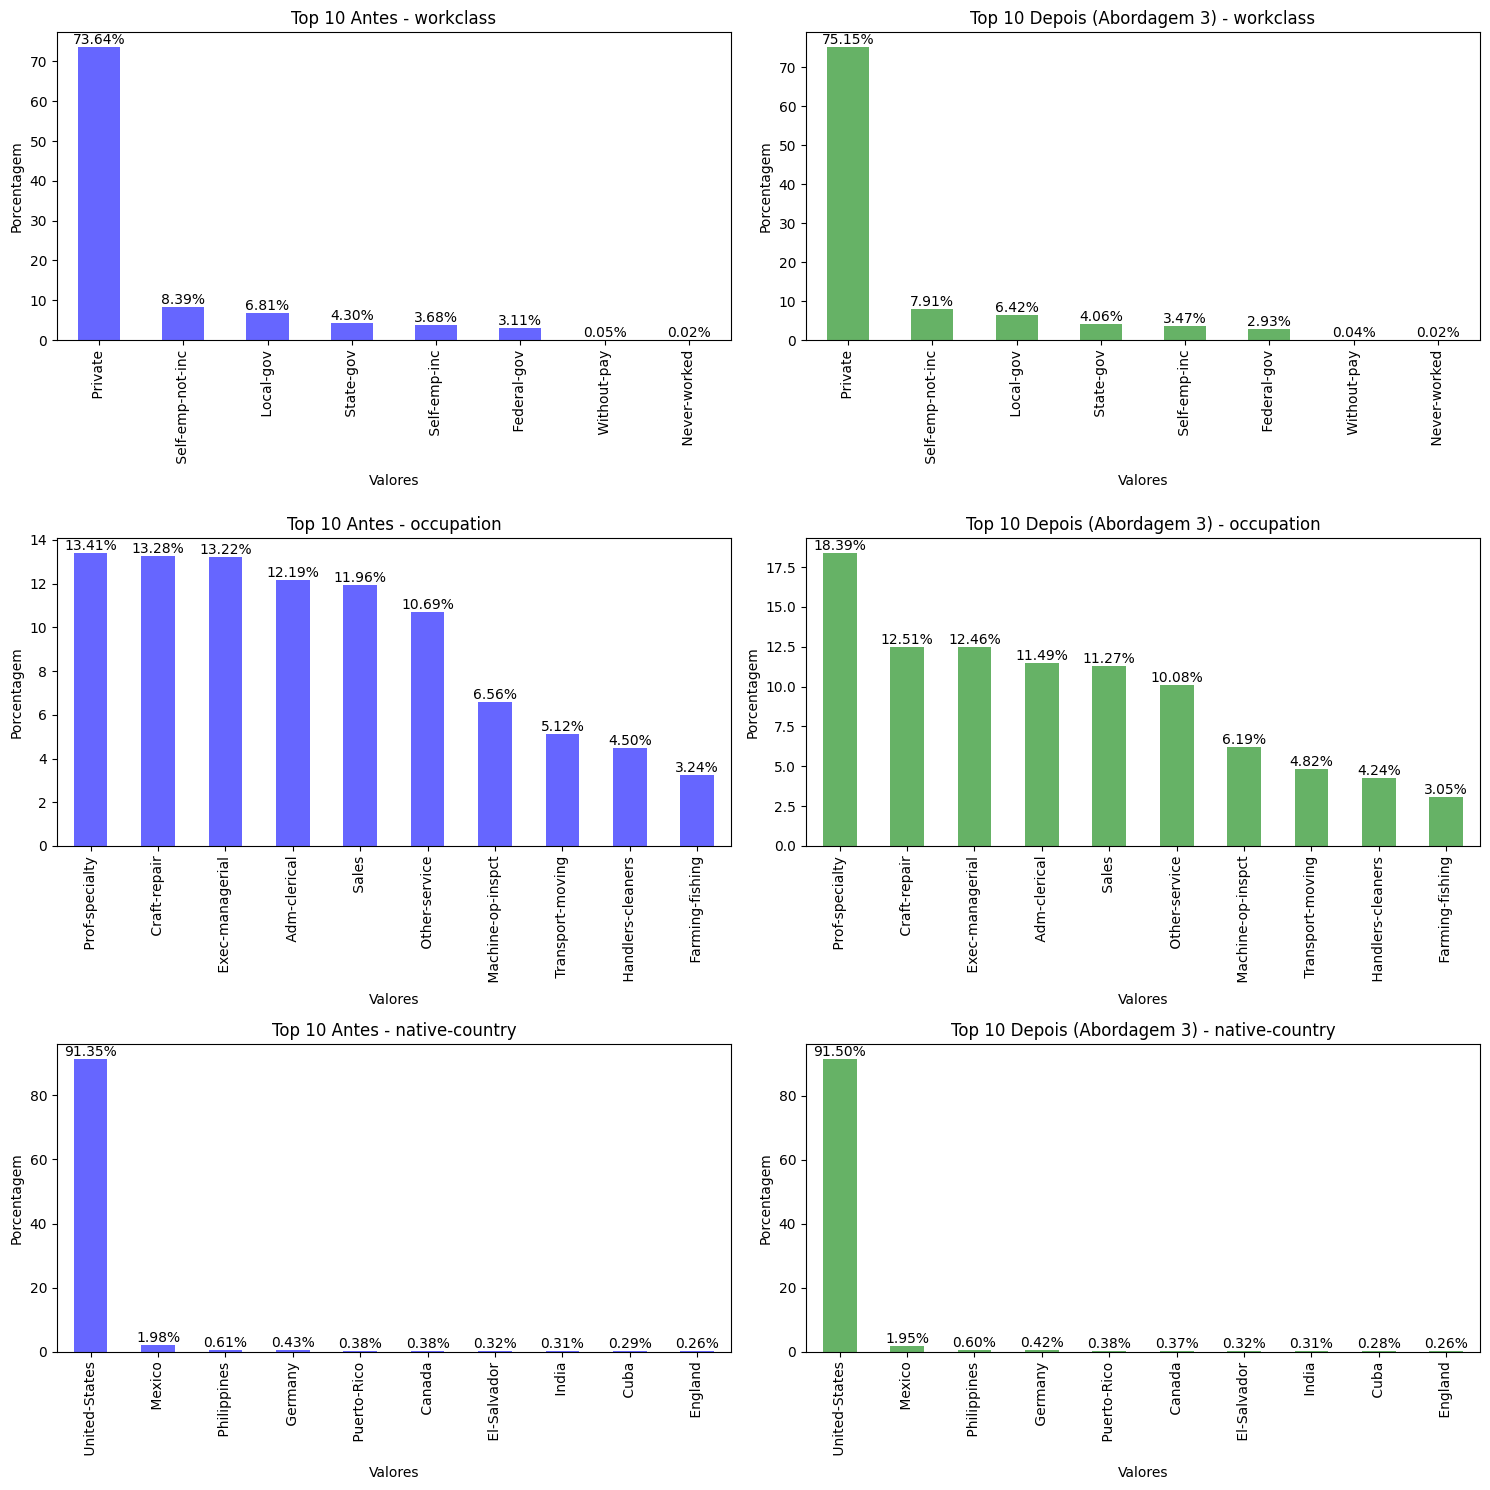

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Carregar os dados
url_train = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
url_test = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
                'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# Lendo os dados de treino e teste
train_data = pd.read_csv(url_train, names=column_names, na_values=' ?')
test_data = pd.read_csv(url_test, names=column_names, na_values=' ?')

# Combine os conjuntos de treino e teste para facilitar o pré-processamento
combined_data = pd.concat([train_data, test_data], axis=0)

# Análise inicial
print("Número de amostras antes de tratar os valores ausentes e outliers:", len(combined_data))
print("Número de valores ausentes por coluna:")
print(combined_data.isnull().sum())

# Tratamento de valores ausentes

# Abordagem 1: Excluir linhas com valores ausentes
cleaned_data_1 = combined_data.dropna()

# Abordagem 2: Preencher valores ausentes com a média (para colunas numéricas) e moda (para colunas categóricas)
cleaned_data_2 = combined_data.copy()
for col in cleaned_data_2.columns:
    if cleaned_data_2[col].dtype == 'object':
        cleaned_data_2[col] = cleaned_data_2[col].fillna(cleaned_data_2[col].mode()[0])
    else:
        cleaned_data_2[col] = cleaned_data_2[col].fillna(cleaned_data_2[col].mean())

# Abordagem 3: Imputação de valores ausentes com SimpleImputer do scikit-learn
cleaned_data_3 = combined_data.copy()
imputer = SimpleImputer(strategy='most_frequent')
cleaned_data_3[cleaned_data_3.select_dtypes(include=['object']).columns] = imputer.fit_transform(cleaned_data_3[cleaned_data_3.select_dtypes(include=['object']).columns])
imputer = SimpleImputer(strategy='mean')
cleaned_data_3[cleaned_data_3.select_dtypes(include=['int64', 'float64']).columns] = imputer.fit_transform(cleaned_data_3[cleaned_data_3.select_dtypes(include=['int64', 'float64']).columns])

# Resultados após o tratamento dos valores ausentes
print("\nNúmero de amostras após tratamento dos valores ausentes (Abordagem 1):", len(cleaned_data_1))
print("\nNúmero de amostras após tratamento dos valores ausentes (Abordagem 2):", len(cleaned_data_2))
print("\nNúmero de amostras após tratamento dos valores ausentes (Abordagem 3):", len(cleaned_data_3))

# Identificação e remoção de outliers usando a regra do IQR
Q1 = combined_data['hours-per-week'].quantile(0.25)
Q3 = combined_data['hours-per-week'].quantile(0.75)
IQR = Q3 - Q1

# Calculando outliers por coluna
outliers = combined_data[(combined_data['hours-per-week'] < (Q1 - 1.5 * IQR)) | (combined_data['hours-per-week'] > (Q3 + 1.5 * IQR))]
non_outliers = combined_data[~((combined_data['hours-per-week'] < (Q1 - 1.5 * IQR)) | (combined_data['hours-per-week'] > (Q3 + 1.5 * IQR)))]

# Redefinir o índice dos DataFrames
outliers.reset_index(drop=True, inplace=True)
non_outliers.reset_index(drop=True, inplace=True)

# Função para calcular a distribuição percentual dos 10 maiores valores
def calculate_top10_percentage(df):
    top10_percentage = (df.value_counts(normalize=True).head(10) * 100).sort_values(ascending=False)
    return top10_percentage

# Selecionar as colunas de interesse
cols_of_interest = ['workclass', 'occupation', 'native-country']

# Obter as 10 maiores ocorrências para cada coluna de interesse antes e depois da abordagem 1
original_top10 = {}
cleaned_top10 = {}

for col in cols_of_interest:
    original_top10[col] = calculate_top10_percentage(combined_data[col])
    cleaned_top10[col] = calculate_top10_percentage(cleaned_data_1[col])

# Plotar os gráficos de barras com valores acima das barras
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

for i, col in enumerate(cols_of_interest):
    original_top10[col].plot(kind='bar', ax=axs[i, 0], color='blue', alpha=0.6)
    axs[i, 0].set_title(f'Top 10 Antes - {col}')
    axs[i, 0].set_ylabel('Porcentagem')
    axs[i, 0].set_xlabel('Valores')

    for idx, value in enumerate(original_top10[col]):
        axs[i, 0].text(idx, value, f'{value:.2f}%', ha='center', va='bottom')

    cleaned_top10[col].plot(kind='bar', ax=axs[i, 1], color='orange', alpha=0.6)
    axs[i, 1].set_title(f'Top 10 Depois - {col}')
    axs[i, 1].set_ylabel('Porcentagem')
    axs[i, 1].set_xlabel('Valores')

    for idx, value in enumerate(cleaned_top10[col]):
        axs[i, 1].text(idx, value, f'{value:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Função para calcular a distribuição percentual dos 10 maiores valores
def calculate_top10_percentage(df):
    top10_percentage = (df.value_counts(normalize=True).head(10) * 100).sort_values(ascending=False)
    return top10_percentage

# Selecionar as colunas de interesse
cols_of_interest = ['workclass', 'occupation', 'native-country']

# Obter as 10 maiores ocorrências para cada coluna de interesse antes e depois das abordagens 2 e 3
cleaned_top10_2 = {}
cleaned_top10_3 = {}

for col in cols_of_interest:
    cleaned_top10_2[col] = calculate_top10_percentage(cleaned_data_2[col])
    cleaned_top10_3[col] = calculate_top10_percentage(cleaned_data_3[col])

# Plotar os gráficos de barras com valores acima das barras
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

for i, col in enumerate(cols_of_interest):
    original_top10[col].plot(kind='bar', ax=axs[i, 0], color='blue', alpha=0.6)
    axs[i, 0].set_title(f'Top 10 Antes - {col}')
    axs[i, 0].set_ylabel('Porcentagem')
    axs[i, 0].set_xlabel('Valores')

    for idx, value in enumerate(original_top10[col]):
        axs[i, 0].text(idx, value, f'{value:.2f}%', ha='center', va='bottom')

    cleaned_top10_2[col].plot(kind='bar', ax=axs[i, 1], color='orange', alpha=0.6)
    axs[i, 1].set_title(f'Top 10 Depois (Abordagem 2) - {col}')
    axs[i, 1].set_ylabel('Porcentagem')
    axs[i, 1].set_xlabel('Valores')

    for idx, value in enumerate(cleaned_top10_2[col]):
        axs[i, 1].text(idx, value, f'{value:.2f}%', ha='center', va='bottom')

# Plotar os gráficos de barras com valores acima das barras
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

for i, col in enumerate(cols_of_interest):
    original_top10[col].plot(kind='bar', ax=axs[i, 0], color='blue', alpha=0.6)
    axs[i, 0].set_title(f'Top 10 Antes - {col}')
    axs[i, 0].set_ylabel('Porcentagem')
    axs[i, 0].set_xlabel('Valores')

    for idx, value in enumerate(original_top10[col]):
        axs[i, 0].text(idx, value, f'{value:.2f}%', ha='center', va='bottom')

    cleaned_top10_3[col].plot(kind='bar', ax=axs[i, 1], color='green', alpha=0.6)
    axs[i, 1].set_title(f'Top 10 Depois (Abordagem 3) - {col}')
    axs[i, 1].set_ylabel('Porcentagem')
    axs[i, 1].set_xlabel('Valores')

    for idx, value in enumerate(cleaned_top10_3[col]):
        axs[i, 1].text(idx, value, f'{value:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

